## Replicate Part

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
suicide_analysis = pd.read_csv("suicide.csv")
suicide_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [3]:
suicide_analysis.suicides_no.fillna(0,inplace=True)
suicide_data = suicide_analysis.groupby(['year','age']).sum()['suicides_no'].reset_index()
suicide_data

,year,age,suicides_no
0,1979,15-24 years,14701.0
1,1979,25-34 years,17149.0
2,1979,35-54 years,28614.0
3,1979,5-14 years,635.0
4,1979,55-74 years,23270.0
...,...,...,...
223,2016,25-34 years,2203.0
224,2016,35-54 years,6086.0
225,2016,5-14 years,96.0
226,2016,55-74 years,4913.0


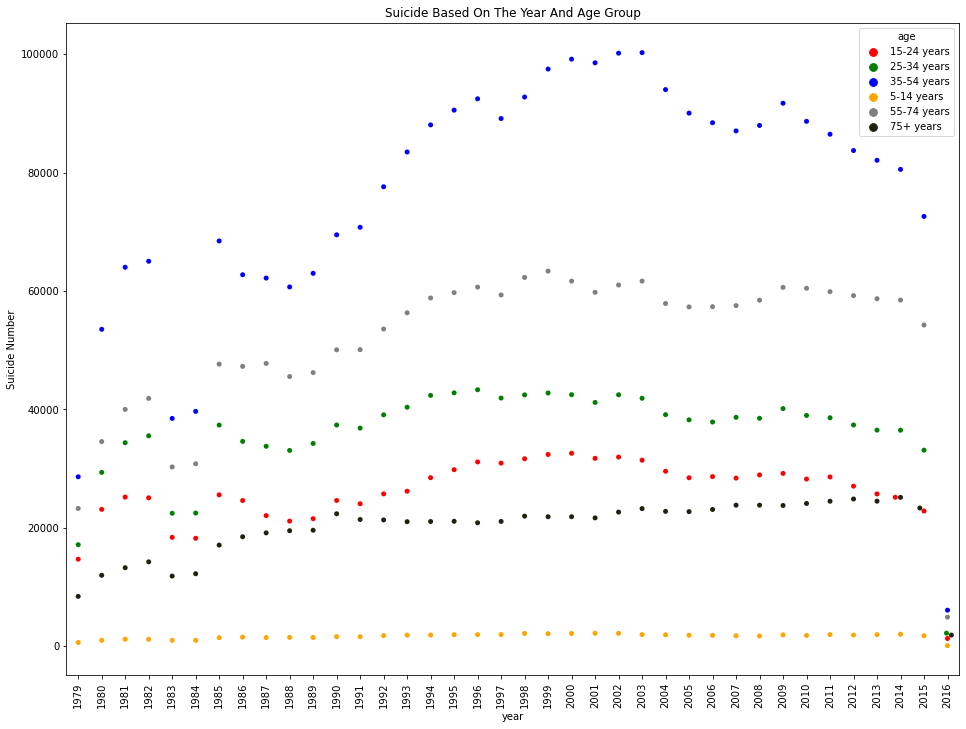

In [4]:
#Suicide Based on Year And Age
color=['red','green','blue','orange','gray','#222111']
plt.figure(figsize=(16,12))
sns.swarmplot(x='year',y='suicides_no',hue='age',data=suicide_data,palette=color)
plt.title("Suicide Based On The Year And Age Group")
plt.xticks(rotation=90)
plt.ylabel("Suicide Number")
plt.savefig('suicidepre.png')

## Improve Part
### Step1: Merge the age group

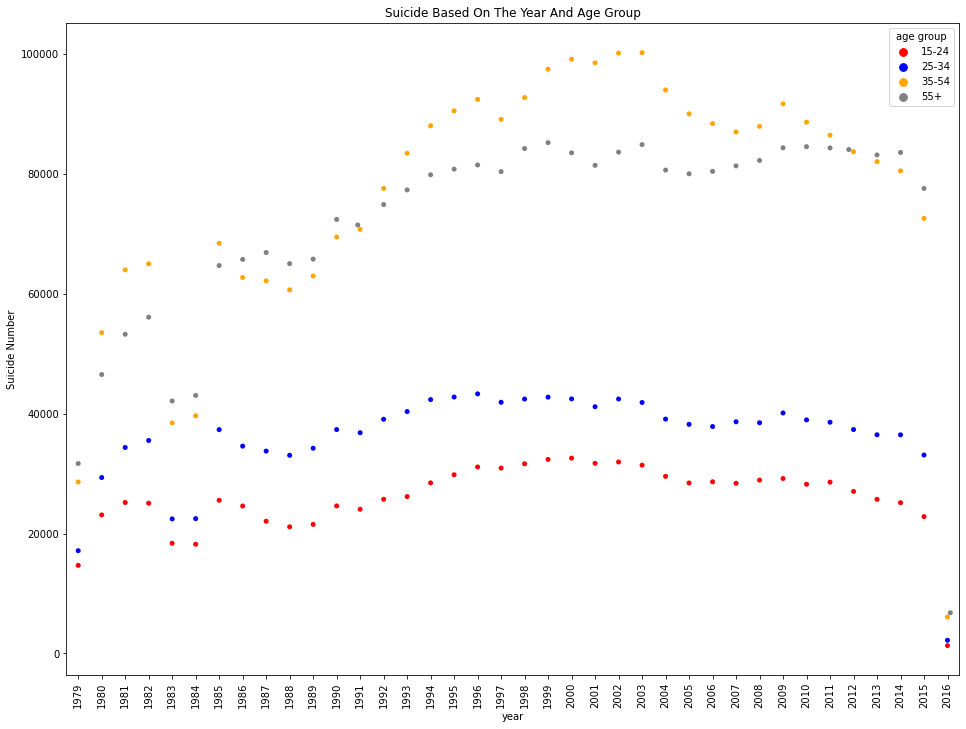

In [9]:
suicide_analysis = suicide_analysis[(suicide_analysis['age']!='5-14 years')]
age_coder = {'15-24 years':'15-24', '25-34 years':'25-34', '35-54 years':'35-54', 
             '55-74 years':'55+', '75+ years':'55+'}
suicide_analysis['age group'] = suicide_analysis['age'].map(age_coder)
suicide_analysis.suicides_no.fillna(0,inplace=True)
suicide_data2 = suicide_analysis.groupby(['year','age group']).sum()['suicides_no'].reset_index()
color=['red','blue','orange','gray']
ax, fig = plt.subplots(figsize=(16,12))
ax = sns.swarmplot(x='year',y='suicides_no',hue='age group',data=suicide_data2,palette=color)
plt.title("Suicide Based On The Year And Age Group")
plt.xticks(rotation=90)
plt.ylabel("Suicide Number")
plt.savefig('suicide_s1.png')

### Step2: Remove 2016 data(Incompleted Statistic)

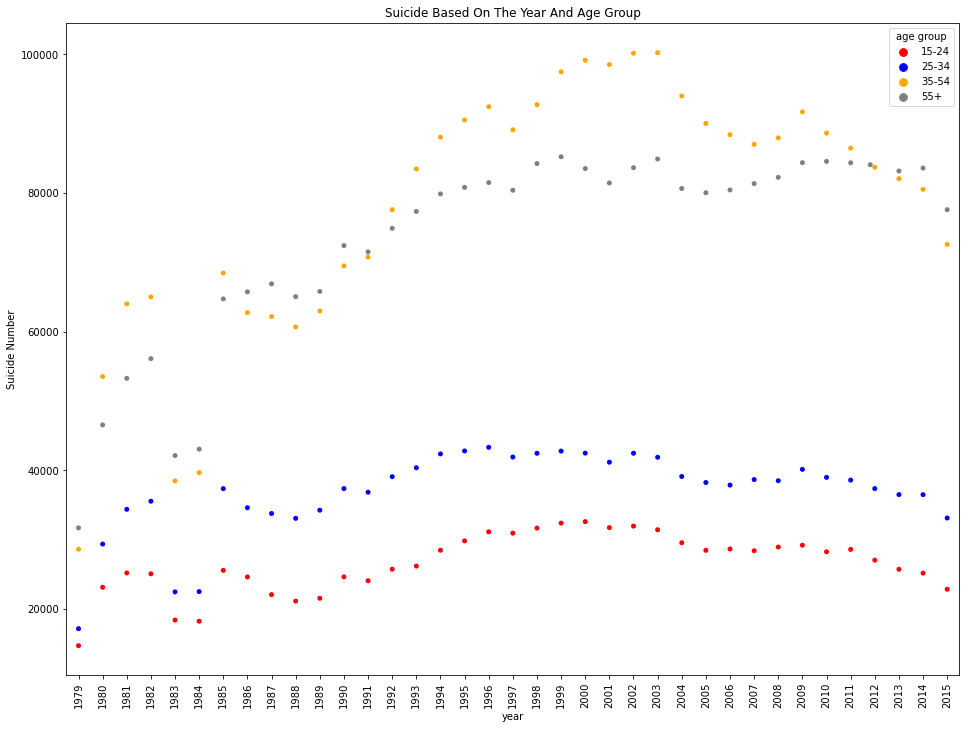

In [10]:
suicide_data2 = suicide_data2[(suicide_data2['year']!=2016)]
color=['red','blue','orange','gray']
ax, fig = plt.subplots(figsize=(16,12))
ax = sns.swarmplot(x='year',y='suicides_no',hue='age group',data=suicide_data2,palette=color)
plt.title("Suicide Based On The Year And Age Group")
plt.xticks(rotation=90)
plt.ylabel("Suicide Number")
plt.savefig('suicide_s2.png')

### Step3：Xticks rotate 90 degree

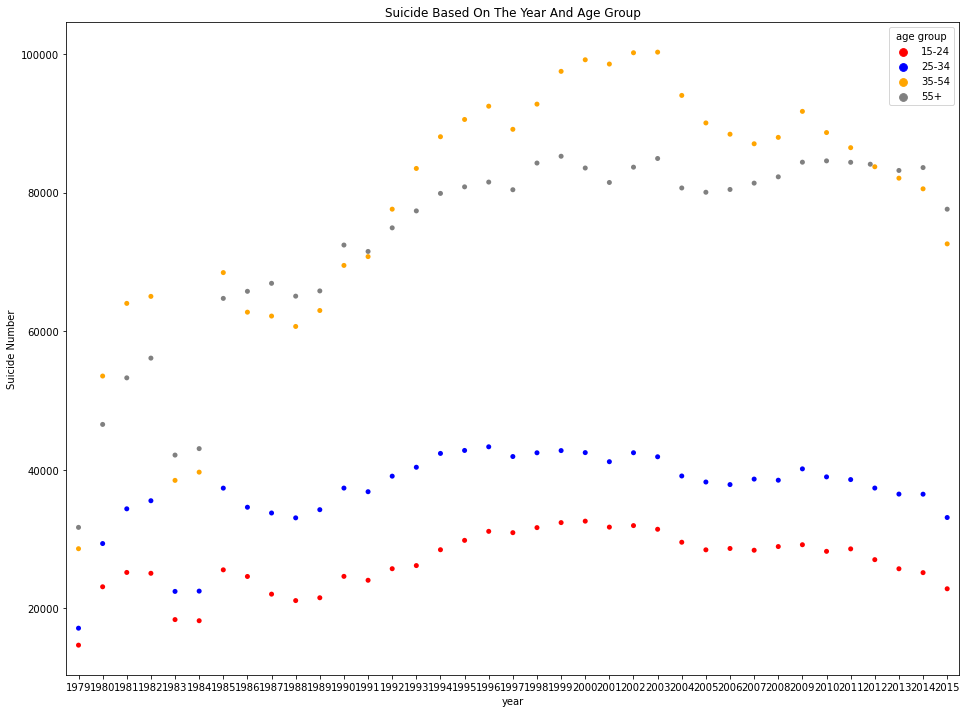

In [11]:
ax, fig = plt.subplots(figsize=(16,12))
color=['red','blue','orange','gray']
ax = sns.swarmplot(x='year',y='suicides_no',hue='age group',data=suicide_data2,palette=color)
plt.title("Suicide Based On The Year And Age Group")
plt.ylabel("Suicide Number")
plt.savefig('suicide_s3.png')

### Step4: Change to line plot

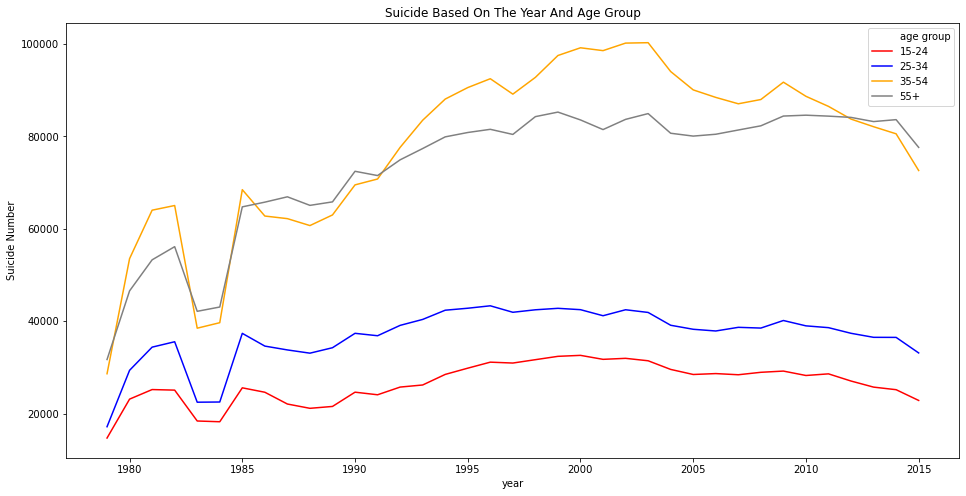

In [12]:
color=['red','blue','orange','gray']
ax, fig = plt.subplots(figsize=(16,8))
ax = sns.lineplot(x='year',y='suicides_no',hue='age group',data=suicide_data2,palette=color)
plt.title("Suicide Based On The Year And Age Group")
plt.ylabel("Suicide Number")
plt.savefig('suicide_s4.png')

### Step5: Remove top and right border

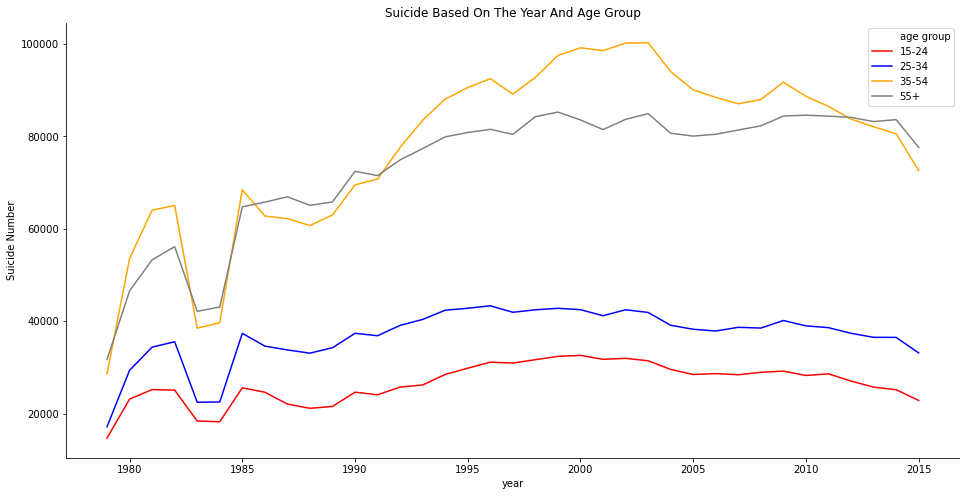

In [13]:
color=['red','blue','orange','gray']
ax, fig = plt.subplots(figsize=(16,8))
ax = sns.lineplot(x='year',y='suicides_no',hue='age group',data=suicide_data2,palette=color)
plt.title("Suicide Based On The Year And Age Group")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel("Suicide Number")
plt.savefig('suicide_s5.png')

### Step6: Adjust the yticks and Emphasize

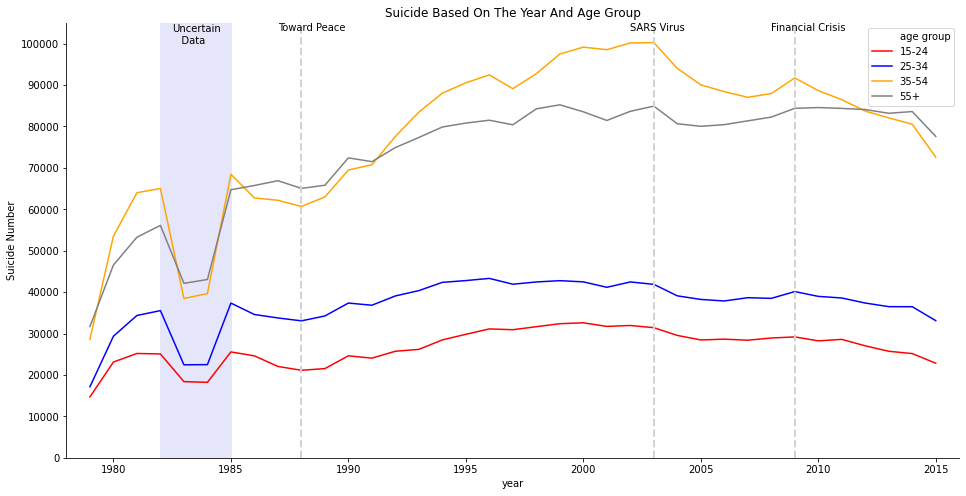

In [50]:
from matplotlib.pyplot import MultipleLocator
color=['red','blue','orange','gray']
ax, fig = plt.subplots(figsize=(16,8))

ax = sns.lineplot(x='year',y='suicides_no',hue='age group',data=suicide_data2,palette=color)
plt.title("Suicide Based On The Year And Age Group")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axis([1978,2016,0,105000])
y_major_locator=MultipleLocator(10000)
ax.yaxis.set_major_locator(y_major_locator)

ax.fill_betweenx([0,105000],x1 = 1982, x2 = 1985, color='#E6E6FA')
plt.annotate("Uncertain\n   Data", (1982.5,100000), xytext=(1982.5,100000))

plt.axvline(x=2003, c="#d3d3d3", linestyle='dashed',linewidth=2)
plt.axvline(x=1988, c="#d3d3d3", linestyle='dashed',linewidth=2)
plt.axvline(x=2009, c="#d3d3d3", linestyle='dashed',linewidth=2)
plt.annotate("Toward Peace", (1988,100000), xytext=(1987,103000))
plt.annotate("SARS Virus ", (2003,100000), xytext=(2002,103000))
plt.annotate("Financial Crisis ", (2009,100000), xytext=(2008,103000))
plt.ylabel("Suicide Number")
plt.savefig('suicide.png')

## Step7 : Produce suicide rate visualization

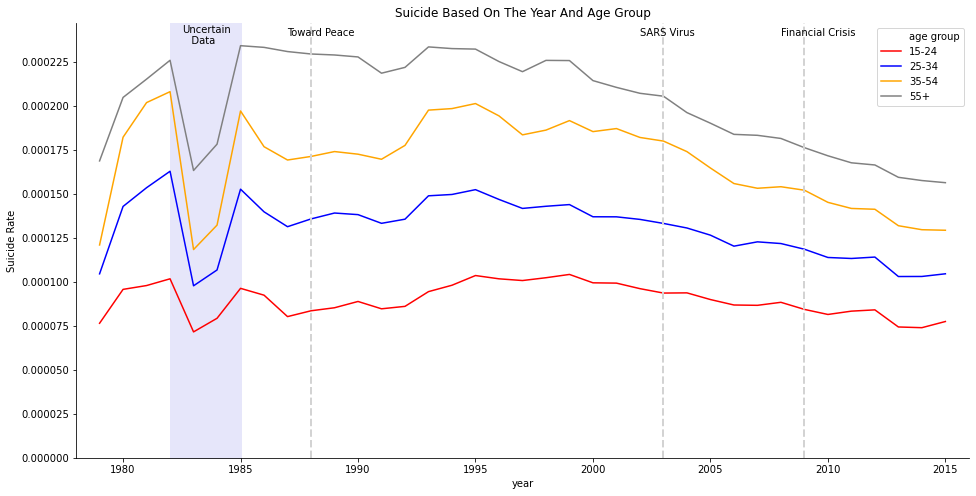

In [44]:
suicide_data3 = suicide_analysis.groupby(['year','age group']).sum()['population'].reset_index()
suicide_data3['suicide_rate'] = suicide_data2['suicides_no']/suicide_data3['population']
suicide_data3 = suicide_data3[(suicide_data3['year']!=2016)]
suicide_data3.drop(['population'], axis = 1)
color=['red','blue','orange','gray']
ax, fig = plt.subplots(figsize=(16,8))

ax = sns.lineplot(x='year',y='suicide_rate',hue='age group',data=suicide_data3,palette=color)
plt.title("Suicide Based On The Year And Age Group")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axis([1978,2016,0,0.000247])
plt.axvline(x=2003, c="#d3d3d3", linestyle='dashed',linewidth=2)
plt.axvline(x=1988, c="#d3d3d3", linestyle='dashed',linewidth=2)
plt.axvline(x=2009, c="#d3d3d3", linestyle='dashed',linewidth=2)
plt.annotate("Toward Peace", (1988,0.00024), xytext=(1987,0.00024))
plt.annotate("SARS Virus ", (2003,0.00024), xytext=(2002,0.00024))
plt.annotate("Financial Crisis ", (2009,0.00024), xytext=(2008,0.00024))

y_major_locator=MultipleLocator(0.000025)
ax.yaxis.set_major_locator(y_major_locator)

ax.fill_betweenx([0,0.00025],x1 = 1982, x2 = 1985, color='#E6E6FA')
plt.annotate("Uncertain\n   Data", (1982.5,0.000235), xytext=(1982.5,0.000235))
plt.ylabel("Suicide Rate")
plt.savefig('rate.png')